In [ ]:
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("noodulz/pokemon-dataset-1000")

print("Path to dataset files:", path)

destination = "./dataset/pokemon_data"
shutil.copytree(path, destination, dirs_exist_ok=True)

In [2]:
import os
import shutil
import random

# Paths
base_path = destination+"/pokemon-dataset-1000"
dataset_path = os.path.join(base_path, "dataset")
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")
test_path = os.path.join(base_path, "test")

# Create directories for train, val, and test splits
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Train-Val-Test split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Iterate through class folders
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Check if it's a directory
        # Get all image files in the class folder
        images = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith('.png')]

        # Shuffle images for randomness
        random.shuffle(images)

        # Calculate split sizes
        train_size = int(len(images) * train_ratio)
        val_size = int(len(images) * val_ratio)

        # Split images
        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Create class subfolders in train, val, and test directories
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

        # Move images to respective directories
        for img in train_images:
            shutil.copy(img, os.path.join(train_path, class_name))
        for img in val_images:
            shutil.copy(img, os.path.join(val_path, class_name))
        for img in test_images:
            shutil.copy(img, os.path.join(test_path, class_name))

        print(f"Processed class: {class_name}")

print("Dataset split into train, val, and test folders.")


Processed class: bidoof
Processed class: hariyama
Processed class: sudowoodo
Processed class: alcremie
Processed class: diglett
Processed class: shedinja
Processed class: eldegoss
Processed class: ariados
Processed class: tyrunt
Processed class: iron-hands
Processed class: clawitzer
Processed class: forretress
Processed class: thundurus-incarnate
Processed class: pansear
Processed class: salandit
Processed class: orthworm
Processed class: lumineon
Processed class: patrat
Processed class: frigibax
Processed class: rillaboom
Processed class: watchog
Processed class: kartana
Processed class: sandile
Processed class: staraptor
Processed class: beheeyem
Processed class: dubwool
Processed class: bombirdier
Processed class: magnemite
Processed class: pidgey
Processed class: drizzile
Processed class: shelmet
Processed class: golisopod
Processed class: cosmog
Processed class: gliscor
Processed class: spritzee
Processed class: drifblim
Processed class: malamar
Processed class: purugly
Processed 

In [3]:
import tensorflow as tf

In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./dataset/pokemon_data/pokemon-dataset-1000/train",
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./dataset/pokemon_data/pokemon-dataset-1000/val",
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 26288 files belonging to 1000 classes.
Found 6469 files belonging to 1000 classes.


In [5]:
train = train.map(lambda x, y: (x/255.0, tf.one_hot(y, len(train.class_names))))
val = val.map(lambda x, y: (x/255.0, tf.one_hot(y, len(val.class_names))))

In [6]:
input = tf.keras.Input(shape=(224, 224, 3))

conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input)
norm1 = tf.keras.layers.BatchNormalization()(conv1)
pool1 = tf.keras.layers.MaxPooling2D((2, 2))(norm1)
conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(pool1)
norm2 = tf.keras.layers.BatchNormalization()(conv2)

flatten = tf.keras.layers.Flatten()(norm2)
dense1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
output = tf.keras.layers.Dense(1000, activation='softmax')(dense1)

model = tf.keras.Model(input, output)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 380192)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      48,664,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,804,104 (186.17 MB)

 Trainable params: 48,803,976 (186.17 MB)

 Non-trainable params: 128 (512.00 B)

In [8]:
initial_learning_rate = 0.0001
decay_steps = 1000
decay_rate = 0.9

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train,
    validation_data=val,
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.0239 - loss: 7.0488 - val_accuracy: 0.2402 - val_loss: 4.5537
Epoch 2/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.3141 - loss: 4.0536 - val_accuracy: 0.7446 - val_loss: 1.2636
Epoch 3/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.7660 - loss: 1.1824 - val_accuracy: 0.9510 - val_loss: 0.2654
Epoch 4/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9409 - loss: 0.2856 - val_accuracy: 0.9864 - val_loss: 0.0848
Epoch 5/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9837 - loss: 0.0752 - val_accuracy: 0.9940 - val_loss: 0.0437


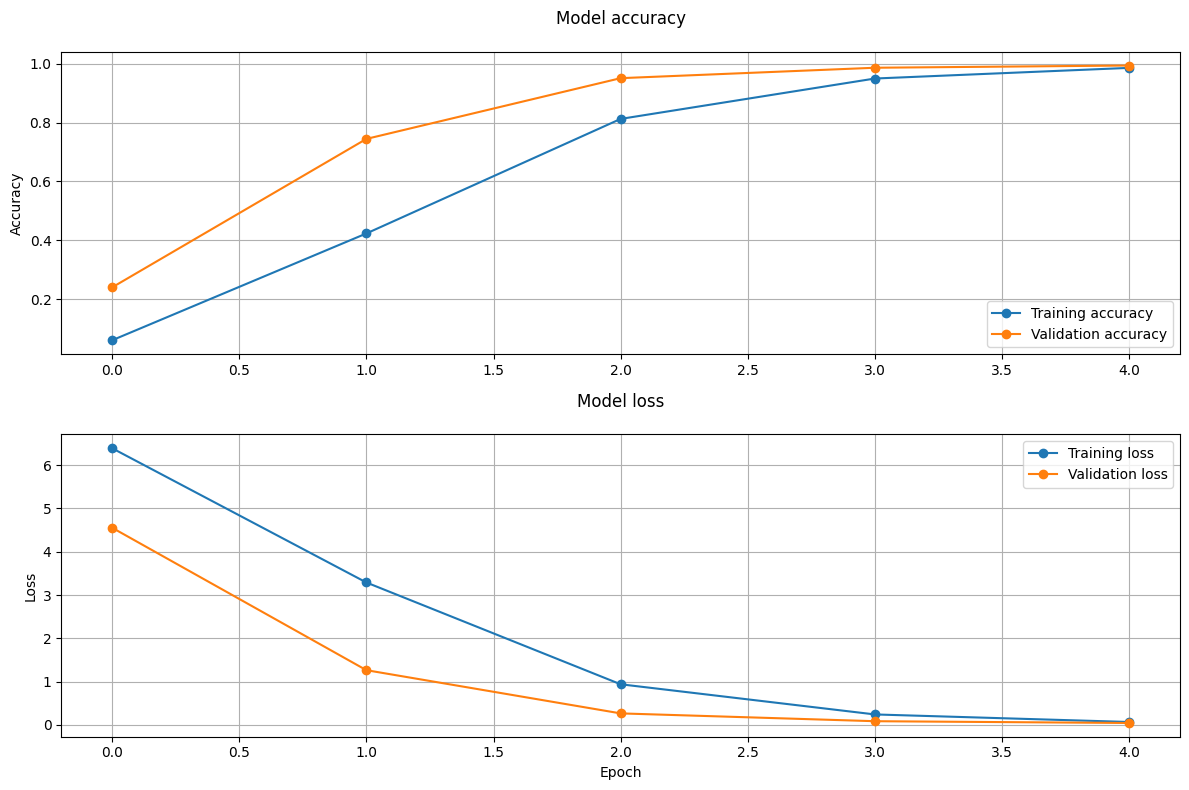

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.figure(figsize=(12, 8))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], 'o-', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='Validation accuracy')
plt.title('Model accuracy', pad=20)
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], 'o-', label='Training loss')
plt.plot(history.history['val_loss'], 'o-', label='Validation loss')
plt.title('Model loss', pad=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
model.save("model.h5")

In [20]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./dataset/pokemon_data/pokemon-dataset-1000/test",
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 8464 files belonging to 1000 classes.


In [21]:
# 먼저 class_names 저장
class_names = test.class_names

# 데이터 전처리
test = test.map(lambda x, y: (x/255.0, tf.one_hot(y, len(test.class_names))))

# 예측
for images, labels in test.take(1):
    predictions = model.predict(images)

    # 처음 10개 이미지에 대한 예측 결과 출력
    for i in range(min(10, len(predictions))):
        predicted_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[np.argmax(labels[i])]
        confidence = np.max(predictions[i])

        print(f"이미지 {i+1}:")
        print(f"  예측: {predicted_class}")
        print(f"  실제: {true_class}")
        print(f"  신뢰도: {confidence:.2%}")
        print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
이미지 1:
  예측: finneon
  실제: finneon
  신뢰도: 99.94%

이미지 2:
  예측: vibrava
  실제: vibrava
  신뢰도: 97.77%

이미지 3:
  예측: tornadus-incarnate
  실제: tornadus-incarnate
  신뢰도: 99.88%

이미지 4:
  예측: comfey
  실제: comfey
  신뢰도: 99.45%

이미지 5:
  예측: chikorita
  실제: chikorita
  신뢰도: 99.99%

이미지 6:
  예측: sealeo
  실제: sealeo
  신뢰도: 99.99%

이미지 7:
  예측: maschiff
  실제: maschiff
  신뢰도: 99.89%

이미지 8:
  예측: wooper
  실제: wooper
  신뢰도: 100.00%

이미지 9:
  예측: slugma
  실제: slugma
  신뢰도: 98.71%

이미지 10:
  예측: haunter
  실제: haunter
  신뢰도: 99.99%

